# Eigendecomposition

### Affine Transformation via Matrix Application

In [36]:
import numpy as np

# TensorFlow
import tensorflow as tf
print(tf.__version__)

# PyTorch
import torch
print(torch.__version__)


import matplotlib.pyplot as plt

2.17.0
2.5.1


In [37]:
# Let say we have a vector v:
v = np.array([3, 1])
v

array([3, 1])

In [38]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

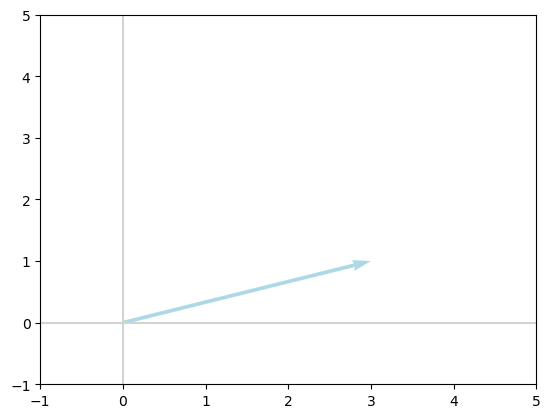

In [39]:

plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [40]:

I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [41]:
Iv = np.dot(I, v)
v == Iv

array([ True,  True])

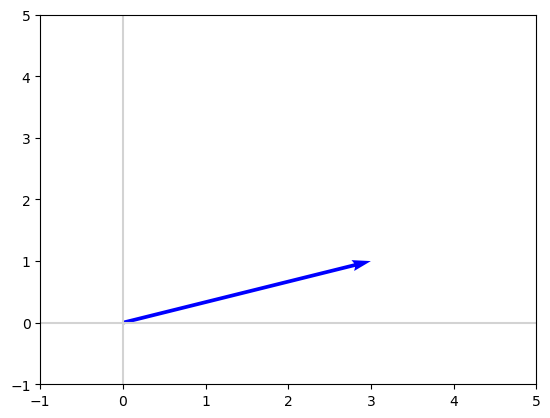

In [42]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [43]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [44]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

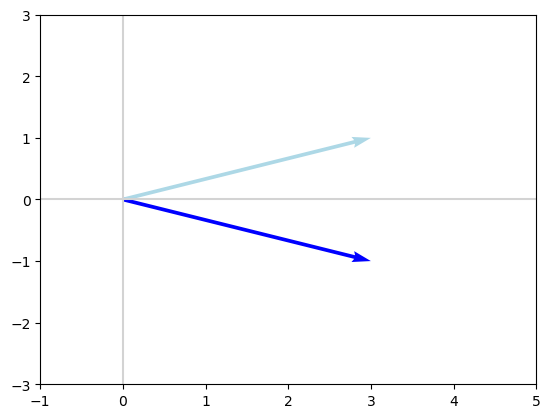

In [45]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Applying a flipping matrix is an example of an affine transformation: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine transformations include:

Scaling (changing the length of vectors)
Shearing (example of this on the Mona Lisa coming up shortly)
Rotation

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix to the vector :

In [46]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [47]:
Av = np.dot(A, v)
Av

array([1, 4])

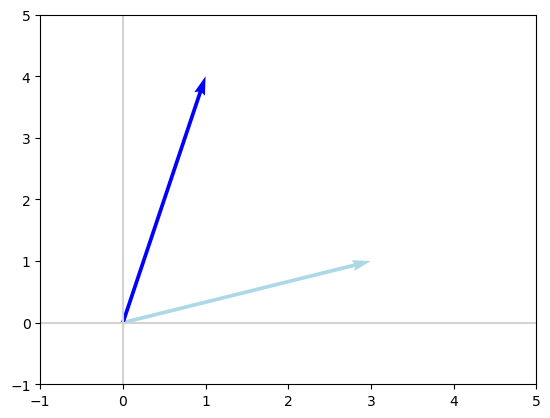

In [48]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

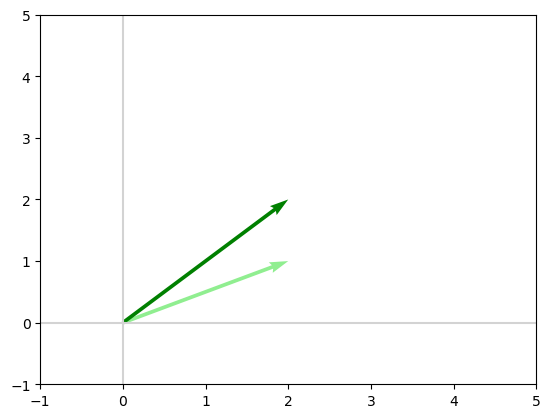

In [49]:

# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, V), where each column is a separate vector. Then, whatever linear transformations we apply to V will be independently applied to each column (vector):

In [50]:
v

array([3, 1])

In [51]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [52]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [182]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 0.86011126, -0.76454754, -3.        , -1.        ],
        [ 0.51010647,  0.64456735, -1.        ,  1.        ]])

In [180]:
IV = np.dot(I, V)
IV

array([[1., 0.],
       [0., 1.]])

In [55]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [56]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [57]:
vectorfy(V, 0)

array([3, 1])

In [58]:
vectorfy(V, 0) == v

array([ True,  True])

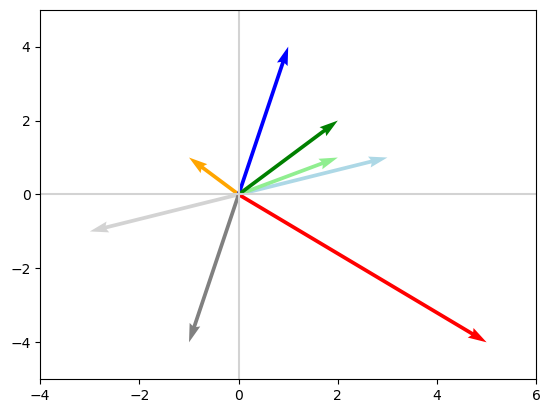

In [59]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

## Eigenvectors and Eigenvalues
An eigenvector (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") is a special vector v such that when it is transformed by some matrix (let's say A), the product Av has the exact same direction as v.

An eigenvalue is a scalar (traditionally represented as λ) that simply scales the eigenvector  such that the following equation is satisfied:

Av = λv <br>
Easiest way to understand this is to work through an example:

In [60]:
A


array([[-1,  4],
       [ 2, -2]])

In [61]:
# We can use eig() for finding lambda and v in a tuple form

lambdas, V = np.linalg.eig(A)

In [62]:
lambdas

array([ 1.37228132, -4.37228132])

In [63]:
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

We can prove that Av = λv,

In [64]:
A

array([[-1,  4],
       [ 2, -2]])

In [65]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [66]:
lambduh = lambdas[0]
lambduh

1.3722813232690143

In [67]:
np.dot(A,v)

array([1.18031462, 0.70000958])

In [68]:
np.dot(lambduh,v)

array([1.18031462, 0.70000958])

In [73]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [74]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [75]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [76]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

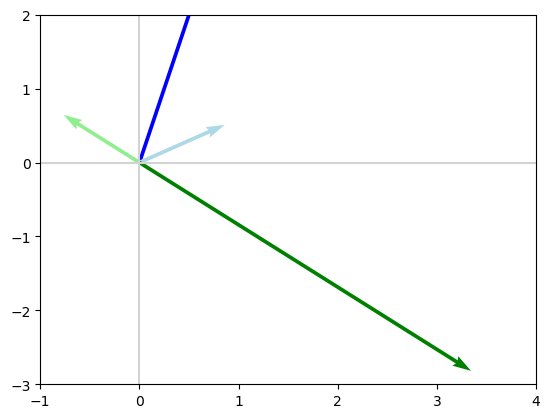

In [77]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)


Using the PyTorch eig() method, we can do exactly the same:

In [78]:

A

array([[-1,  4],
       [ 2, -2]])

In [117]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [118]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p)

In [81]:
V_cplx

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [82]:
V_p = V_cplx.float()
V_p

/var/folders/ck/gsp7_6zx6cxc9ghdyg9hsqp40000gn/T/ipykernel_58302/1096125134.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/aten/src/ATen/native/Copy.cpp:308.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [83]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [84]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [85]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [86]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [87]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [88]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [89]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [90]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [91]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [92]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

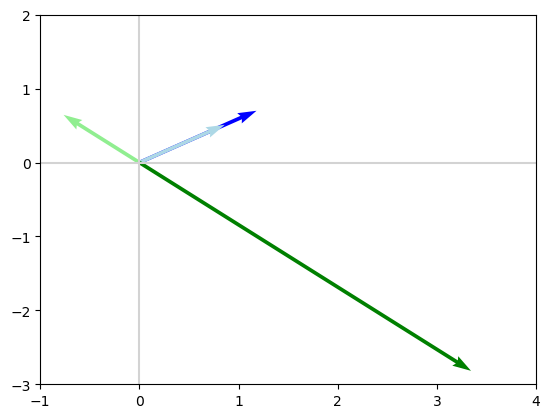

In [93]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

## Eigenvectors in >2 Dimensions
While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows):

In [94]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [95]:
lambdas_X, V_X = np.linalg.eig(X)

In [96]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [97]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

In [98]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [99]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948916

In [100]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [101]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [102]:
# Second Column vectors
v_x2= V_X[:,1] 
v_x2

array([-0.6501921 ,  0.74464056,  0.15086635])

In [105]:
lambda_X2 = lambdas_X[1] 
lambda_X2

20.621173650535344

In [108]:
np.dot(X, v_x2)

array([-13.40772428,  15.3553624 ,   3.11104129])

In [109]:
lambda_X2 * v_x2

array([-13.40772428,  15.3553624 ,   3.11104129])

With pytorch

In [123]:
A_py2 = torch.tensor([[25, 2, 9], [5, 26, -5], [3, 7, -1.]]) # must be float for PyTorch eig()
A_py2

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [127]:
lambdas_cppy2, V_cppy2 = torch.linalg.eig(A_py2)
print(lambdas_cppy2)
print(V_cppy2)

tensor([29.6762+0.j, 20.6212+0.j, -0.2974+0.j])
tensor([[ 0.7118+0.j,  0.6502+0.j, -0.3422+0.j],
        [ 0.6665+0.j, -0.7446+0.j,  0.2379+0.j],
        [ 0.2217+0.j, -0.1509+0.j,  0.9090+0.j]])


In [130]:
lambdas_py2 = lambdas_cppy2.float()
V_py2 = V_cppy2.float()
print(lambdas_py2)
print(V_py2)

tensor([29.6762, 20.6212, -0.2974])
tensor([[ 0.7118,  0.6502, -0.3422],
        [ 0.6665, -0.7446,  0.2379],
        [ 0.2217, -0.1509,  0.9090]])


In [133]:
# Slicing
lambdas_py21 = lambdas_py2[0]
V_py21 = V_py2[:,0]
print(lambdas_py21)
print(V_py21)

tensor(29.6762)
tensor([0.7118, 0.6665, 0.2217])


In [136]:
Av_py2 = torch.matmul(A_py2, V_py21)
Lbda_py2 = lambdas_py21*V_py21 
print(Av_py2)
print(Lbda_py2)


tensor([21.1223, 19.7798,  6.5792])
tensor([21.1223, 19.7798,  6.5792])



### 2x2 Matrix Determinants

In [137]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [138]:
np.linalg.det(X)

-2.0000000000000004

In [140]:
x1 = np.linalg.det([[-4,1], [-8, 2]])
x1

0.0

## Generalizing Determinants


In [142]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [145]:
X_det=np.linalg.det(X)

In [148]:
round(X_det)

20

### Determinants and Eigenvalues


In [150]:
lambdas, V =  np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [151]:
np.product(lambdas)

19.99999999999999

##### Thus proving the equation:

`Det(X) = product of all eigen values of X`

Let's use a matrix B, which is composed of basis vectors, to explore the impact of applying matrices with varying |det(X)| values:

In [153]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

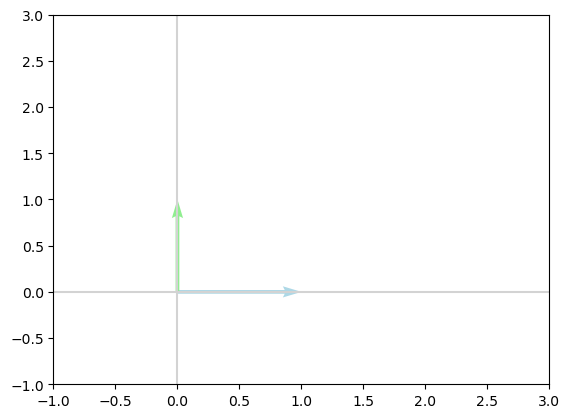

In [154]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)


Let's start by applying the matrix N to B, recalling from earlier that N is singular:

In [156]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must be float for PyTorch eig()
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [157]:
np.linalg.det(N)

0.0

In [158]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

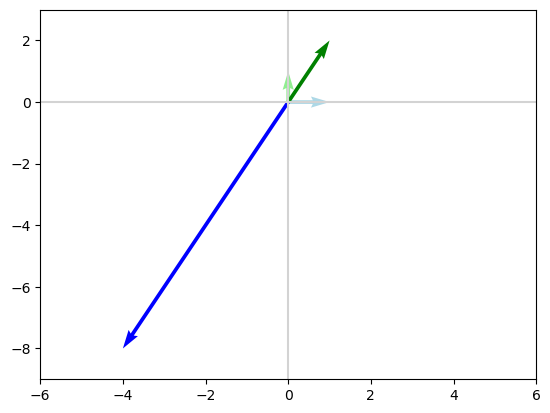

In [159]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [160]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

Aha! If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero.

Now let's try applying I<sub>2</sub> to B :

In [161]:
I

array([[1, 0],
       [0, 1]])

In [162]:
np.linalg.det(I)

1.0

In [163]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

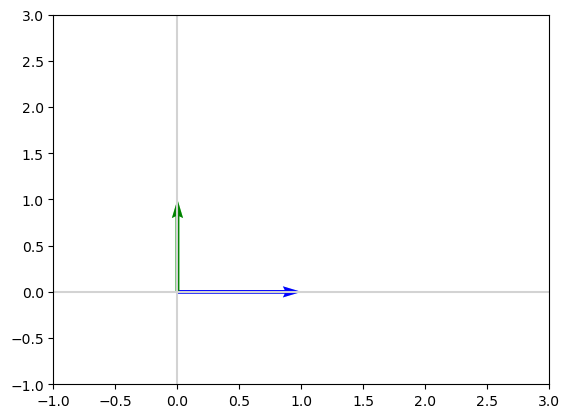

In [164]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [165]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix J which is more interesting:

In [166]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [167]:
np.linalg.det(J)

-1.0

In [168]:
np.abs(np.linalg.det(J))

1.0

In [169]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

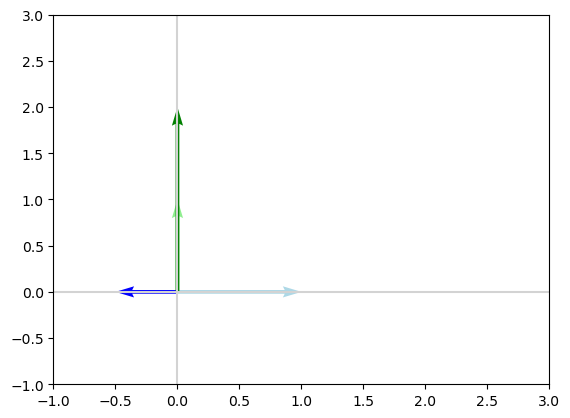

In [170]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [171]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix D, which scales vectors by doubling along both the  and axes:

In [172]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [173]:
np.linalg.det(D)

4.0

In [174]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

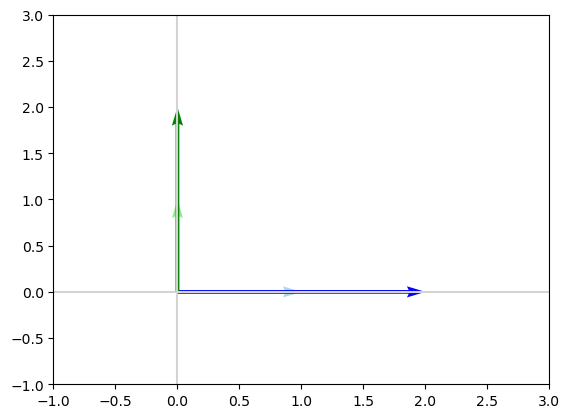

In [175]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [176]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

## Eigendecomposition
The eigendecomposition of some matrix  is

A = V Λ V<sup>-1</sup>

Where:

* As in examples above, V is the concatenation of all the eigenvectors of A

* Λ (upper-case λ) is the diagonal matrix diag(λ). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix A.


In [183]:
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [184]:
lambdas, V = np.linalg.eig(A)
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [185]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [186]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that: A = V Λ V<sup>-1</sup>

In [187]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers.

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. 
**If A is a real symmetric matrix then...**

A = Q Λ Q<sup>T</sup>

...where Q is analogous to V from the previous equation except that it's special because it's an orthogonal matrix.

In [188]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [191]:
lambdas, Q = np.linalg.eig(A)
lambdas

array([3., 1.])

In [192]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [193]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Lets Confirm, A = Q Λ Q<sup>T</sup>

In [194]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that Q is an orthogonal matrix because:

 Q<sup>T</sup>Q = QQ<sup>T</sup> = I)

In [195]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [196]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])